Head of python_train_data.csv:
  Gender Religion Branch  Roll-1  Roll-2  Roll-3  Math-1 Theory  \
0      M    Hindu     CE     350     288     176             47   
1      F    Hindu    CST      18      23      16             84   
2      F    Hindu   AIML      23       3       8             74   
3      M    Hindu    CST     212     140      81             55   
4      M    Hindu    CST     208     323     195             38   

   Physics Theory  Physics Practical  Java-1 Theory  ...  Java-1 Attendance  \
0              48                 75             50  ...              97.00   
1              83                 81             61  ...              88.79   
2              85                 86             64  ...              97.98   
3              69                 82             56  ...              96.23   
4              59                 74             36  ...              97.92   

   Software Engineering Attendance  Environmental Science Attendance  \
0                  

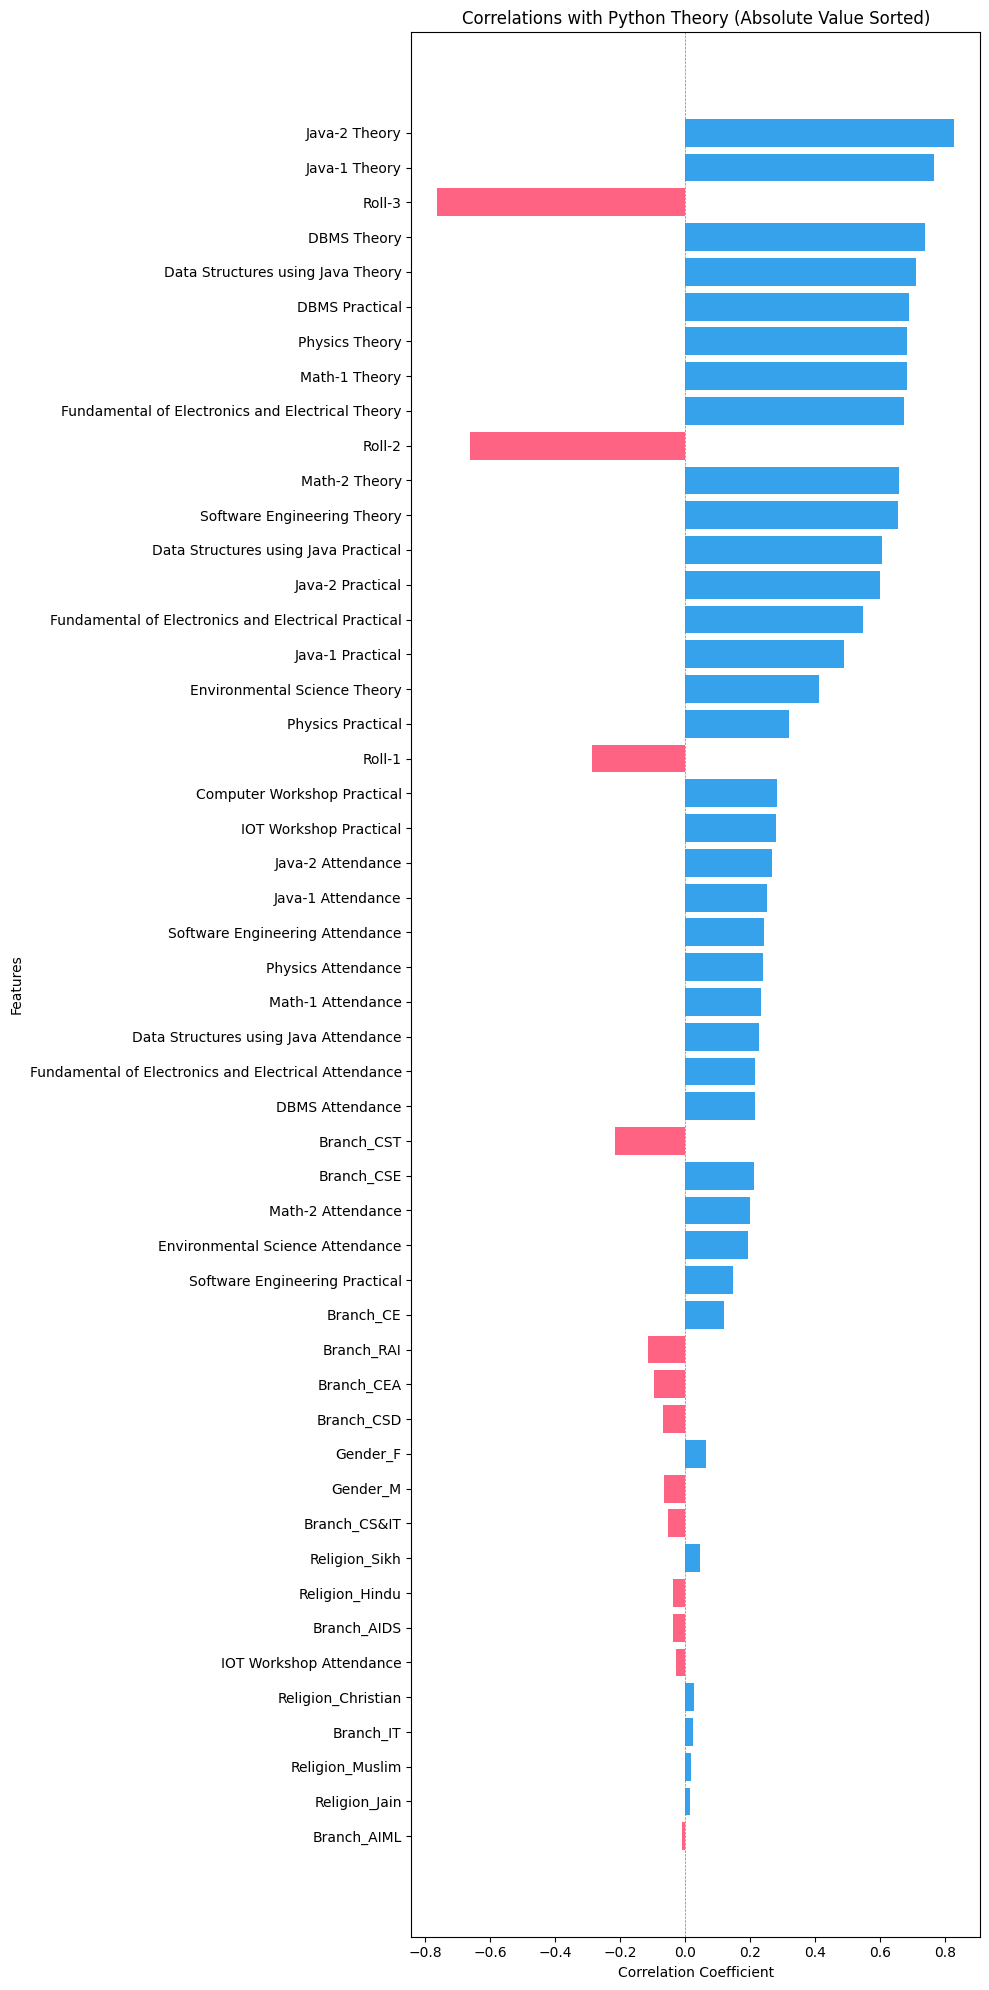

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Python train data
df = pd.read_csv('python_train_data.csv')

# Print the first 5 rows
print("Head of python_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with Python Theory
for col in numeric_cols:
    if col != 'Python Theory':  # Exclude the target itself
        corr = df[col].corr(df['Python Theory'])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch']:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df['Python Theory'])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if 'Roll-1' in df.columns:
    corr = df['Roll-1'].astype(float).corr(df['Python Theory'])
    correlations['Roll-1'] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print sorted correlations
print("\nCorrelations with Python Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, max(8, len(labels) * 0.4)))  # Adjust height based on number of features
plt.barh(labels[::-1], values[::-1], color=np.where(np.array(values[::-1]) >= 0, '#36A2EB', '#FF6384'))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlations with Python Theory (Absolute Value Sorted)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Head of python_train_data.csv:
  Gender Religion Branch  Roll-1  Roll-2  Roll-3  Math-1 Theory  \
0      M    Hindu     CE     350     288     176             47   
1      F    Hindu    CST      18      23      16             84   
2      F    Hindu   AIML      23       3       8             74   
3      M    Hindu    CST     212     140      81             55   
4      M    Hindu    CST     208     323     195             38   

   Physics Theory  Physics Practical  Java-1 Theory  ...  Java-1 Attendance  \
0              48                 75             50  ...              97.00   
1              83                 81             61  ...              88.79   
2              85                 86             64  ...              97.98   
3              69                 82             56  ...              96.23   
4              59                 74             36  ...              97.92   

   Software Engineering Attendance  Environmental Science Attendance  \
0                  

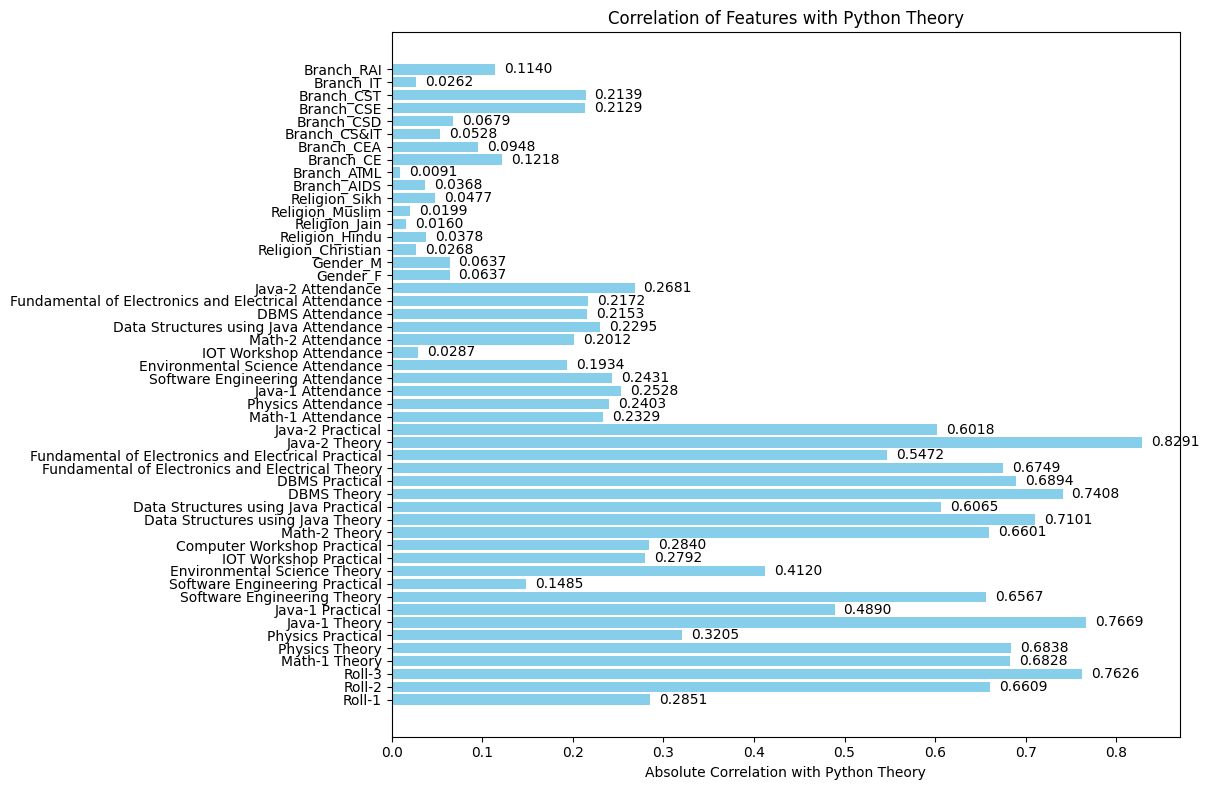

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots display inline in Jupyter Notebook
%matplotlib inline

# Read the Python train data
df = pd.read_csv('python_train_data.csv')

# Print the first 5 rows
print("Head of python_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a DataFrame for correlation calculations (including one-hot encoded categoricals)
df_encoded = df.copy()
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch']:
        encoded = pd.get_dummies(df[col], prefix=col)
        df_encoded = pd.concat([df_encoded, encoded], axis=1)
        df_encoded = df_encoded.drop(columns=[col])

# 1. Create dictionary of absolute correlations with Python Theory
correlations_with_python = {}
for col in df_encoded.columns:
    if col != 'Python Theory':  # Exclude the target itself
        corr = abs(df_encoded[col].corr(df_encoded['Python Theory']))
        correlations_with_python[col] = corr

# Print the correlation dictionary (sorted by absolute value)
print("\nAbsolute correlations with Python Theory:")
for col, corr in sorted(correlations_with_python.items(), key=lambda x: x[1], reverse=True):
    print(f"{col}: {corr:.4f}")

# 2. Compute pairwise correlations between all columns
corr_matrix = df_encoded.corr().abs()  # Absolute correlations

# Initialize list of columns to drop
columns_to_drop = []

# Check for pairs with correlation > 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        if corr_matrix.iloc[i, j] > 0.9 and col1 != 'Python Theory' and col2 != 'Python Theory':
            # Compare correlations with Python Theory
            corr1 = correlations_with_python.get(col1, 0)
            corr2 = correlations_with_python.get(col2, 0)
            # Drop the column with lower correlation with Python Theory
            if corr1 < corr2:
                columns_to_drop.append(col1)
            else:
                columns_to_drop.append(col2)

# Remove duplicates from columns_to_drop
columns_to_drop = list(set(columns_to_drop))
print("\nColumns to drop due to high correlation (> 0.9):")
print(columns_to_drop if columns_to_drop else "No columns with correlation > 0.9")

# Create reduced DataFrame (optional, not saved unless needed)
df_reduced = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# 3. Plot correlations as a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(list(correlations_with_python.keys()), 
                [corr for corr in correlations_with_python.values()], 
                color='skyblue')
plt.xlabel('Absolute Correlation with Python Theory')
plt.title('Correlation of Features with Python Theory')
plt.tight_layout()

# Add correlation values on the bars
for bar, corr in zip(bars, correlations_with_python.values()):
    width = bar.get_width()
    plt.text(x=width + 0.01, y=bar.get_y() + bar.get_height()/2, s=f'{corr:.4f}', 
             ha='left', va='center')

# Display the plot in the notebook
plt.show()